In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Load cleaned CSV
df = pd.read_csv("AirQuality.csv")

In [7]:
# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Select key variables for multivariate forecasting
variables = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
df_selected = df[variables].dropna()

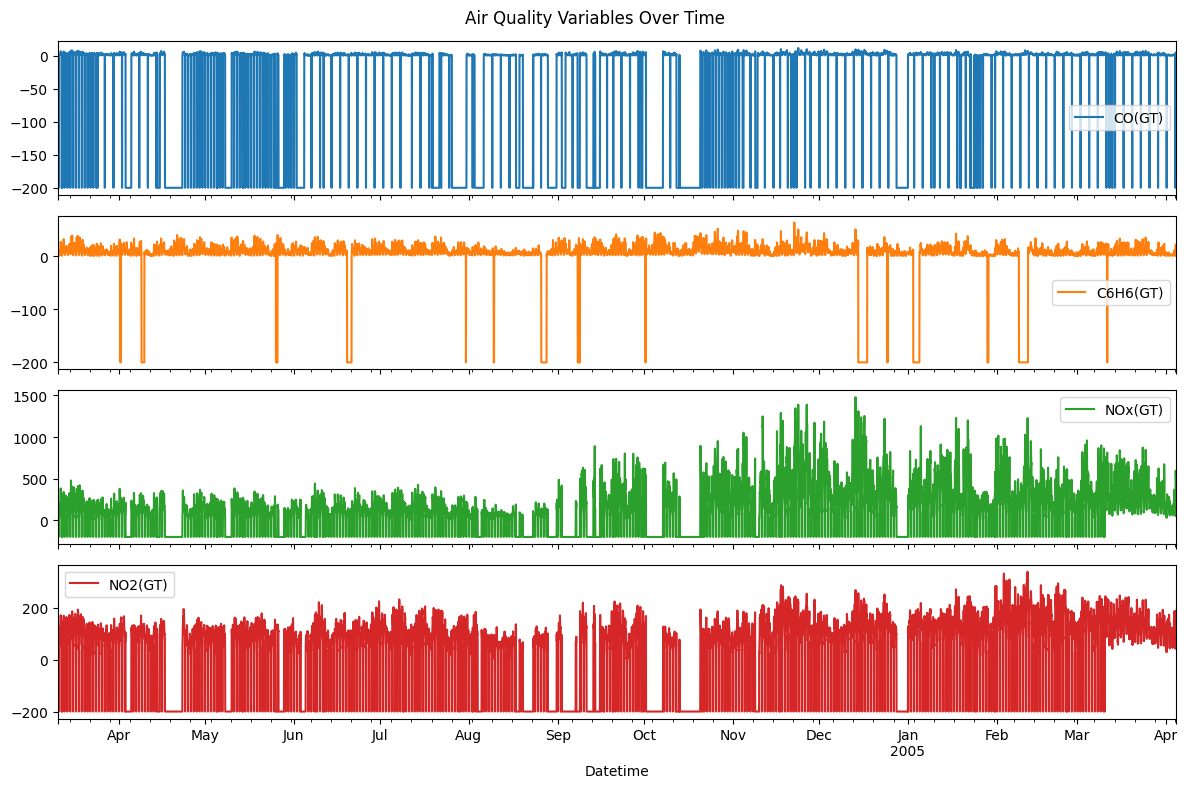

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [8]:
# Plot raw time series
df_selected.plot(subplots=True, figsize=(12, 8), title='Air Quality Variables Over Time')
plt.tight_layout()
plt.show()

# Make the data stationary with first differencing
df_diff = df_selected.diff().dropna()

# Fit VAR model
model = VAR(df_diff)
results = model.fit(maxlags=15, ic='aic')

<ipython-input-9-6bfd0ffaa346>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_df.index = pd.date_range(start=df_diff.index[-1], periods=10, freq='H')


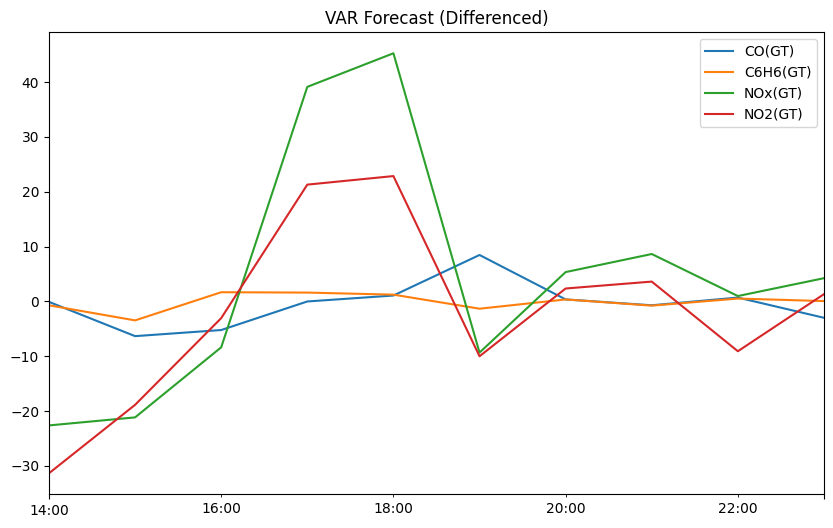

In [9]:
forecast_input = df_diff.values[-results.k_ar:]
forecast = results.forecast(y=forecast_input, steps=10)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, columns=df_diff.columns)
forecast_df.index = pd.date_range(start=df_diff.index[-1], periods=10, freq='H')

# Plot forecast (still differenced values)
forecast_df.plot(figsize=(10, 6), title='VAR Forecast (Differenced)')
plt.show()

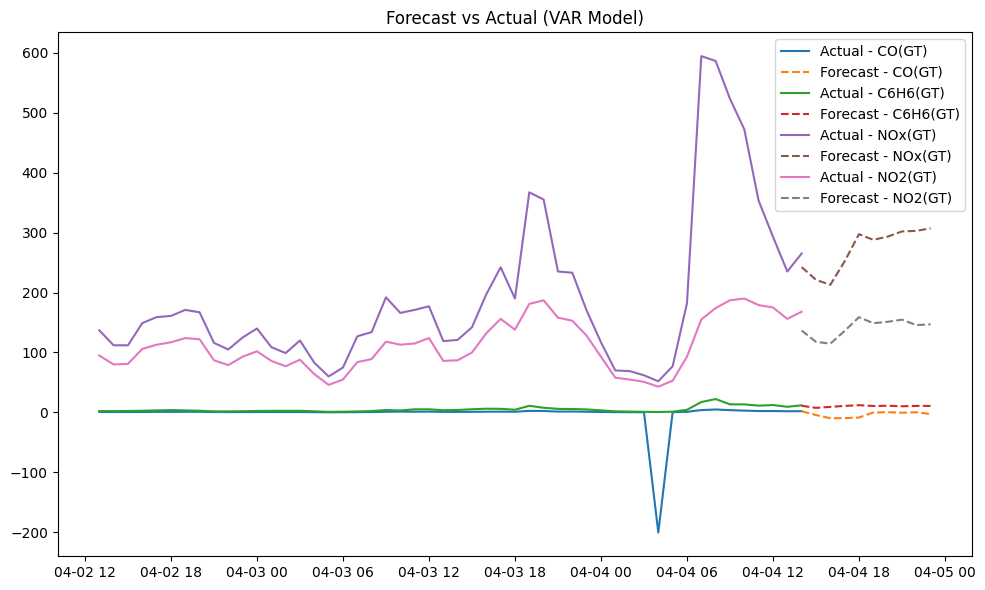

In [10]:

last_actual = df_selected.iloc[-1]
forecast_original = forecast_df.cumsum() + last_actual

plt.figure(figsize=(10, 6))
for col in forecast_original.columns:
    plt.plot(df_selected[col].iloc[-50:], label=f'Actual - {col}')
    plt.plot(forecast_original[col], linestyle='--', label=f'Forecast - {col}')
plt.legend()
plt.title("Forecast vs Actual (VAR Model)")
plt.tight_layout()
plt.show()